<a href="https://colab.research.google.com/github/DanielEXT10/AI/blob/main/Evaluacion_de_la_segmentacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evaluacion de la Segmentacion
* Nombre del Alumno: Daniel Alfonso Garcia Perez
* Materia: Percepcion Computacional

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def display(img,cmap = "gray"):
  fig = plt.figure(figsize=(4,4))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap= 'gray')

Con el fin de comprender el funcionamiento de la segmentacion en las imagenes, utilizaremos una imagen con 6 monedas en un fondo claro, algo importante a destacar y que puede representar un reto es la cercania que tienen una de la otra.



In [ ]:
sep_coins = cv2.imread("/content/pennies.jpg")


El procedimiento a realizar sera el siguiente:
* Median Blur: difuminaremos la imagen para obtener unicamente la silueta de las monedas.

* Grayscale: pasaremos nuestra imagen a una escala de grises lo que facilitara el thresholding de la imagen.

* Binary Threshold: aprovecharemos el metodo de threshold perteneciente a la libreria de opneCV para, transformar nuestra imagen en binario.

* Erotion: Erosionamos la imagen con el fin de aumentar la separacion entre los distintos elementos.

* Find Contours: finalmente generaremos los contornos en nuestra imagen original a partir del resultado de la segmentacion.

#### Median Blur

In [ ]:
sep_blur = cv2.medianBlur(sep_coins, 25)

#### Se tranforma la imagen a escala de grises

In [ ]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

#### Aplicamos Thresholding

In [ ]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

#### Erosionamos tratando de eliminar uniones entre los elementos de la imagen

In [ ]:
kernel = np.ones((5,5), np.uint8)

In [ ]:
sep_erode = cv2.erode(sep_thresh,kernel,iterations = 5)

#### Realizamos una deteccion de contornos

In [ ]:
contours, hierarchy =  cv2.findContours(sep_erode.copy(), cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
for i in range(len(contours)):
  if hierarchy[0][i][3] ==  -1:
    cv2.drawContours(sep_coins,contours,i,(255,0,0),20)

Text(0.5, 1.0, '4.Imagen original con contornos')

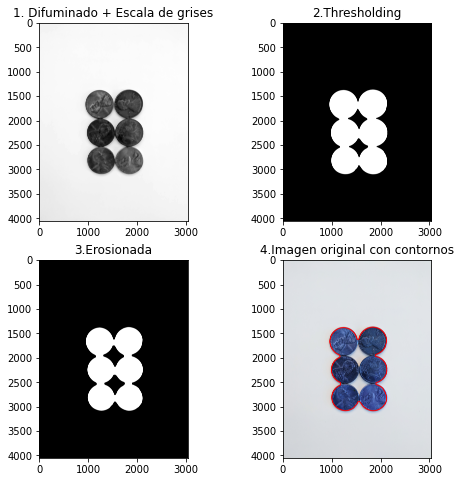

In [ ]:
f, axarr = plt.subplots(2,2,figsize=(8,8))

axarr[0,0].imshow(gray_sep_coins,cmap = 'gray')
axarr[0,1].imshow(sep_thresh,cmap = 'gray')
axarr[1,0].imshow(sep_erode,cmap = 'gray')
axarr[1,1].imshow(sep_coins)

axarr[0, 0].set_title("1. Difuminado + Escala de grises")
axarr[0, 1].set_title("2.Thresholding")
axarr[1, 0].set_title("3.Erosionada")
axarr[1, 1].set_title("4.Imagen original con contornos")

Despues de realizar el procedimiento completo nos damos cuenta de que el algoritmo identifica el conjunto de elementos de la imagen como un unico objeto

### Algoritmo Watershed

Para la implementacion de este algoritmo realizaremos de igual manera los pasos mencionados en el procedimeinto anterior hasta la generacion de la imagen binaria.

In [ ]:
img =cv2.imread("/content/pennies.jpg")
img = cv2.medianBlur(img, 45)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,160,255,cv2.THRESH_BINARY_INV)

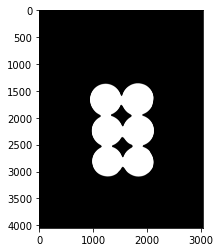

In [ ]:
display(thresh)

#### Aplicamos distance transformations y volvemos a generar una imagen binaria

In [ ]:
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,5)

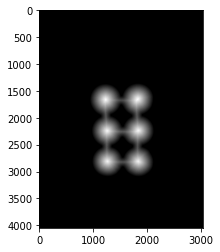

In [ ]:
display(dist_transform)

In [ ]:
ret, foreground = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

Como resultado obtendremos puntos asociados al centro de los elementos de nuestra imagen, el conjunto de estos sera el "Foreground"

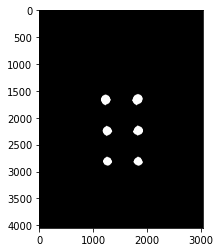

In [ ]:
display(foreground)

Mientras que el background sera nuestra el conjunto de los elementos dilatados

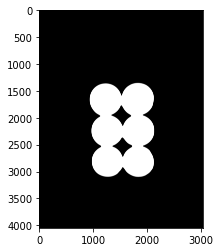

In [ ]:
background = cv2.dilate(thresh,kernel,iterations = 3)
display(background)

La diferencia entre nuestro background y foreground sera la region desconocida, la cual trataremos de aproximar con nuestro algoritmo watershed.

In [ ]:
foreground = np.uint8(foreground)
background = np.uint8(background)
unknown_region = cv2.subtract(background,foreground)

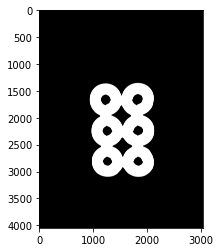

In [ ]:
display(unknown_region)

A partir de nuestro foreground(centros) generaremos una serie de markers o semillas para nuestro algoritmo

In [ ]:
ret, markers = cv2.connectedComponents(foreground)

In [ ]:
markers = markers + 1

In [ ]:
#Es necesario diferenciar entre la region desconocida, los markers y el fondo
markers[unknown_region==255] = 0

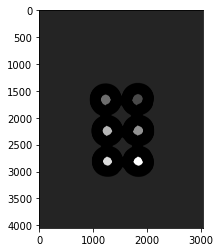

In [ ]:
#Cada semilla esta representada por un diferente tono en la escala de grises
display(markers)

A continuacion agrandamos los marcadores para que abarquen la mayor parte del elemento que representan haciendo uso de la funcion watershed, la cual recibe los markers antes generados asi como la imagen difuminada.

In [ ]:
markers = cv2.watershed(img,markers)

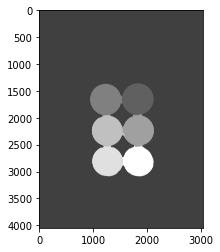

In [ ]:
display(markers)

Finalmente volvemos a extraer los contornos en la imagen original a partir de los marcadores que recien creamos.

In [ ]:
contours, hierarchy =  cv2.findContours(markers.copy(), cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
  if hierarchy[0][i][3] ==  -1:
    cv2.drawContours(sep_coins,contours,i,(0,255,0),20)

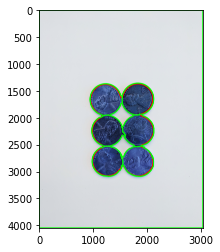

In [ ]:
display(sep_coins)

Como resultado, cobtenemos que cada una de las monedas en la imagen se encuetra correctamente segmentada, se identifican los elementos de manera individual adiferencia del primer algoritmo en donde se detectaba una unica pieza general.

Bibliografia
* Robert Fisher, Simon Perkins, Ashley Walker And Erik Wolfart. (2003, August 25). Morphology - Distance Transform. Distance Transform. Retrieved March 4, 2022, from https://homepages.inf.ed.ac.uk/rbf/HIPR2/distance.html
* J. Portilla, Python for Computer Vision with OpenCV and Deep Learning,Watershed Algorithm,Retrieved March 4, 2022